<a href="https://colab.research.google.com/github/carloidangelo/ECSE-415/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: Image Filtering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

import cv2
import numpy as np
import math

%matplotlib inline

path = '/content/drive/My Drive/ECSE415/Assignments/A1/'

##Thresholding

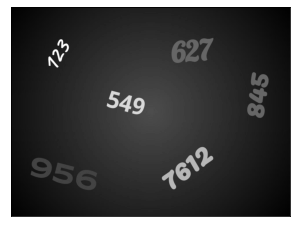

In [ ]:
# read in the image and convert to grayscale for filtering
numbers_image_gray = cv2.imread(path + 'numbers.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5,5))
plt.imshow(numbers_image_gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

###1.

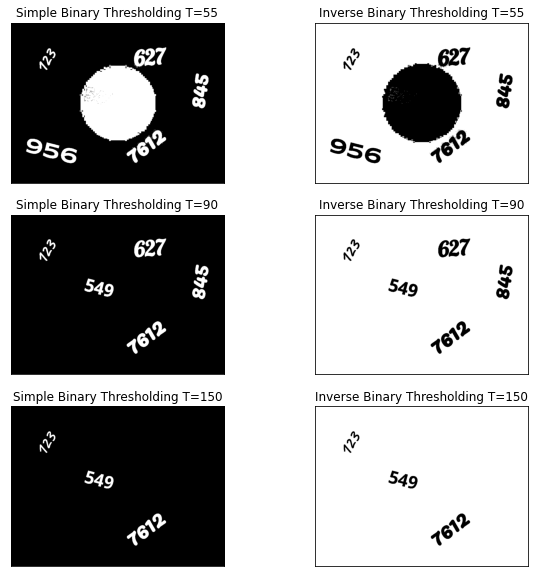

In [ ]:
# set the thresholds
THRESH_1 = 55
THRESH_2 = 90
THRESH_3 = 150

# create placeholders for the output and threshold the image
img_thresh_simple_1 = np.zeros_like(numbers_image_gray)
img_thresh_simple_1[numbers_image_gray>THRESH_1] = 255 
img_thresh_inverse_1 = np.zeros_like(numbers_image_gray)
img_thresh_inverse_1[numbers_image_gray<THRESH_1] = 255 

img_thresh_simple_2 = np.zeros_like(numbers_image_gray)
img_thresh_simple_2[numbers_image_gray>THRESH_2] = 255 
img_thresh_inverse_2 = np.zeros_like(numbers_image_gray)
img_thresh_inverse_2[numbers_image_gray<THRESH_2] = 255 

img_thresh_simple_3 = np.zeros_like(numbers_image_gray)
img_thresh_simple_3[numbers_image_gray>THRESH_3] = 255 
img_thresh_inverse_3 = np.zeros_like(numbers_image_gray)
img_thresh_inverse_3[numbers_image_gray<THRESH_3] = 255 

# display thresholed images
plt.figure(figsize=(10,10))
plt.subplot(321), plt.imshow(img_thresh_simple_1, cmap="gray")
plt.title("Simple Binary Thresholding T=55"), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(img_thresh_inverse_1, cmap="gray")
plt.title("Inverse Binary Thresholding T=55"), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(img_thresh_simple_2, cmap="gray")
plt.title("Simple Binary Thresholding T=90"), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(img_thresh_inverse_2, cmap="gray")
plt.title("Inverse Binary Thresholding T=90"), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(img_thresh_simple_3, cmap="gray")
plt.title("Simple Binary Thresholding T=150"), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(img_thresh_inverse_3, cmap="gray")
plt.title("Inverse Binary Thresholding T=150"), plt.xticks([]), plt.yticks([])
plt.show()

###2.

**Simple Binary Thresholding:**

At T=55, all the numbers are segmented including 123, 549, 627, 845, 956 and 7612. However, we cannot actually identify the number 549 in the thresholded image because its pixels are surrounded by other pixels that also meet the threshold. Instead, what is visible is a cricle filled of foreground pixels. Therefore, only the other five numbers are truly distiguishable.

At T=90, five numbers are segmented and clearly distiguishable, namely, 123, 549, 627, 845 and 7612. 

At T=150, three numbers are segmented and clearly distiguishable, namely, 123, 549 and 7612.

**Inverse Binary Thresholding:**

At T=55, T=90 and T=150, the pixels that were previously replaced with a foreground label in simple binary tresholding are now replaced with a background label and vice versa. Since only the pixel intensities are reversed, the same numbers are distinguishable for each T despite not being in the foreground.

###3.

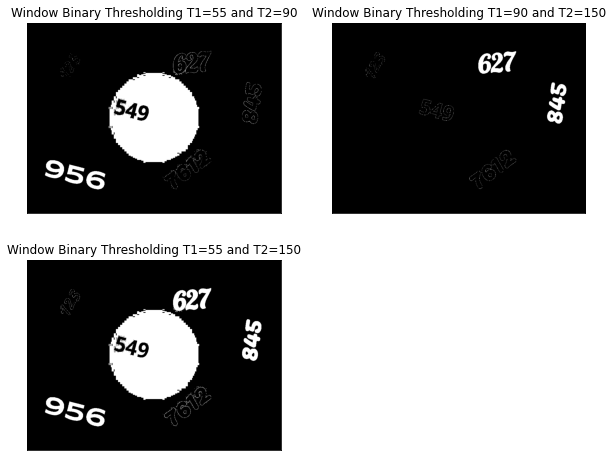

In [ ]:
# set the thresholds
THRESH_1_T1 = 55
THRESH_1_T2 = 90

THRESH_2_T1 = 90
THRESH_2_T2 = 150

THRESH_3_T1 = 55
THRESH_3_T2 = 150

# create placeholders for the output
img_thresh_window_1 = np.zeros_like(numbers_image_gray)
img_thresh_window_2 = np.zeros_like(numbers_image_gray)
img_thresh_window_3 = np.zeros_like(numbers_image_gray)

# read image size
height, width = numbers_image_gray.shape

for row in range(0, height):
  for col in range(0, width):
    if numbers_image_gray[row,col] > THRESH_1_T1 and numbers_image_gray[row,col] < THRESH_1_T2:
      img_thresh_window_1[row, col] = 255
    if numbers_image_gray[row,col] > THRESH_2_T1 and numbers_image_gray[row,col] < THRESH_2_T2:
      img_thresh_window_2[row, col] = 255
    if numbers_image_gray[row,col] > THRESH_3_T1 and numbers_image_gray[row,col] < THRESH_3_T2:
      img_thresh_window_3[row, col] = 255 

# display thresholed images
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(img_thresh_window_1, cmap="gray")
plt.title("Window Binary Thresholding T1=55 and T2=90"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_thresh_window_2, cmap="gray")
plt.title("Window Binary Thresholding T1=90 and T2=150"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_thresh_window_3, cmap="gray")
plt.title("Window Binary Thresholding T1=55 and T2=150"), plt.xticks([]), plt.yticks([])
plt.show()

For T1=55 and T2=90, number 956 is completely segmented. Faint outlines of the numbers 627, 845 and 7612 are also in the foreground. The previously discussed cricle is also segmented, but, this time, without the number 549's pixels. Therefore, the number 549 is also distinguishable despite being in the background.

For T1=90 and T2=150, two numbers are completely segmented, namely, 627 and 845. Faint oultines of the numbers 7612 and 549 are also in the foreground.

For T1=55 and T2=150, it is a combination of the previous two cases. The numbers 956, 627 and 845 are completly segmented. The circle without the number 549's pixels is also segmented. A clearer outline of the number 7612 is also in the foreground.

###4.

Minimum and Maximum pixel values in GrayScale image:
min = 0 max = 255


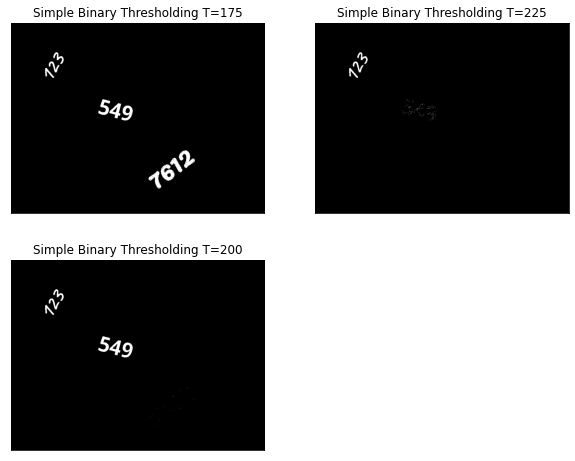

In [ ]:
# see min and max of grayscale image
min = np.min(numbers_image_gray)
max = np.max(numbers_image_gray)
print("Minimum and Maximum pixel values in GrayScale image:")
print("min =", min, "max =", max)

# set the thresholds
THRESH_A = 175
THRESH_B = 225
THRESH_C = 200

# create placeholders for the output and threshold the image
img_thresh_simple_a = np.zeros_like(numbers_image_gray)
img_thresh_simple_a[numbers_image_gray>THRESH_A] = 255 
img_thresh_simple_b = np.zeros_like(numbers_image_gray)
img_thresh_simple_b[numbers_image_gray>THRESH_B] = 255 
img_thresh_simple_c = np.zeros_like(numbers_image_gray)
img_thresh_simple_c[numbers_image_gray>THRESH_C] = 255 

# display thresholed images
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(img_thresh_simple_a, cmap="gray")
plt.title("Simple Binary Thresholding T=175"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_thresh_simple_b, cmap="gray")
plt.title("Simple Binary Thresholding T=225"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_thresh_simple_c, cmap="gray")
plt.title("Simple Binary Thresholding T=200"), plt.xticks([]), plt.yticks([])
plt.show()

**Simple Binary Thresholding:**

At T=175, the numbers 123, 549 and 7612 are segmented. This is a good threshold value to start off at (given unsigned 8-bit intensity information in input image) because it is in the middle of the 0-255 pixel intensity range. Knowing the outcome of this test will narrow down the list of possible threshold values by half.

At T=225, 123 is the only number that is segmented. This result indicates that a smaller threshold value is needed. In other words, the desired threshold value must lie within the range 175-225.

At T=200, the numbers 123 and 549 are segmented meaning that we have arrived at the desired threshold value when using simple binary thresholding.

##Denoising

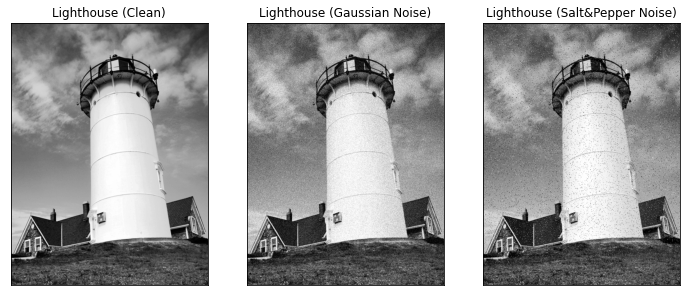

In [ ]:
# read in the images and convert to grayscale for filtering
lighthouse_clean_gray = cv2.imread(path + 'lighthouse.png', cv2.IMREAD_GRAYSCALE)
lighthouse_g_noise_gray = cv2.imread(path + 'gaussian_lighthouse.png', cv2.IMREAD_GRAYSCALE)
lighthouse_sp_noise_gray = cv2.imread(path + 'saltandpepper_lighthouse.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,5))
plt.subplot(131), plt.imshow(lighthouse_clean_gray, cmap="gray")
plt.title("Lighthouse (Clean)"),  plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(lighthouse_g_noise_gray, cmap="gray")
plt.title("Lighthouse (Gaussian Noise)"),  plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(lighthouse_sp_noise_gray, cmap="gray")
plt.title("Lighthouse (Salt&Pepper Noise)"),  plt.xticks([]), plt.yticks([])
plt.show()

###1.

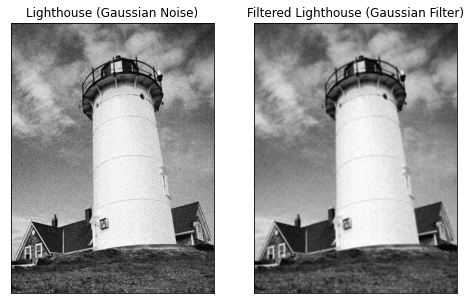

In [ ]:
# filter image using 5x5 Gaussian with variance = 2
filtered_gaussian = cv2.GaussianBlur(lighthouse_g_noise_gray, (5,5), math.sqrt(2), math.sqrt(2))

plt.figure(figsize=(8,5))
plt.subplot(121), plt.imshow(lighthouse_g_noise_gray, cmap="gray")
plt.title("Lighthouse (Gaussian Noise)"),  plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_gaussian, cmap="gray")
plt.title("Filtered Lighthouse (Gaussian Filter)"),  plt.xticks([]), plt.yticks([])
plt.show()

###2.

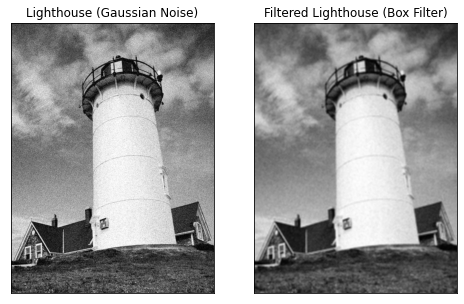

In [ ]:
# filter image using 5x5 Box filter
filtered_box = cv2.blur(lighthouse_g_noise_gray,(5,5))

plt.figure(figsize=(8,5))
plt.subplot(121), plt.imshow(lighthouse_g_noise_gray, cmap="gray")
plt.title("Lighthouse (Gaussian Noise)"),  plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_box, cmap="gray")
plt.title("Filtered Lighthouse (Box Filter)"),  plt.xticks([]), plt.yticks([])
plt.show()

###3.

In [ ]:
# Calculate PSNR
psnr_gaussian = cv2.PSNR(lighthouse_clean_gray, filtered_gaussian)
psnr_box = cv2.PSNR(lighthouse_clean_gray, filtered_box)

print("Gaussian Filter: Peak-Signal-to-Noise-Ratio (PSNR) is", psnr_gaussian,"dB")
print("Box Filter: Peak-Signal-to-Noise-Ratio (PSNR) is", psnr_box,"dB")

Gaussian Filter: Peak-Signal-to-Noise-Ratio (PSNR) is 26.74217379291562 dB
Box Filter: Peak-Signal-to-Noise-Ratio (PSNR) is 25.30151386920589 dB


The guassian filter method gives the superior result.

###4.

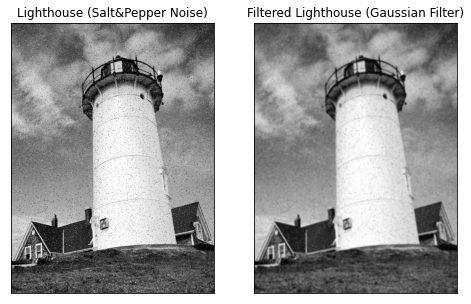

In [ ]:
# filter image using 5x5 Gaussian with variance = 2
filtered_gaussian_sp = cv2.GaussianBlur(lighthouse_sp_noise_gray, (5,5), math.sqrt(2), math.sqrt(2))

plt.figure(figsize=(8,5))
plt.subplot(121), plt.imshow(lighthouse_sp_noise_gray, cmap="gray")
plt.title("Lighthouse (Salt&Pepper Noise)"),  plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_gaussian_sp, cmap="gray")
plt.title("Filtered Lighthouse (Gaussian Filter)"),  plt.xticks([]), plt.yticks([])
plt.show()

###5.

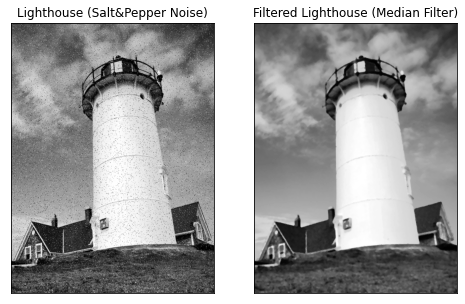

In [ ]:
# filter image using median filter
filtered_median_sp = cv2.medianBlur(lighthouse_sp_noise_gray, 5)

plt.figure(figsize=(8,5))
plt.subplot(121), plt.imshow(lighthouse_sp_noise_gray, cmap="gray")
plt.title("Lighthouse (Salt&Pepper Noise)"),  plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_median_sp, cmap="gray")
plt.title("Filtered Lighthouse (Median Filter)"),  plt.xticks([]), plt.yticks([])
plt.show()

###6.

In [ ]:
# Calculate PSNR
psnr_gaussian_sp = cv2.PSNR(lighthouse_clean_gray, filtered_gaussian_sp)
psnr_median_sp = cv2.PSNR(lighthouse_clean_gray, filtered_median_sp)

print("Gaussian Filter: Peak-Signal-to-Noise-Ratio (PSNR) is", psnr_gaussian_sp,"dB")
print("Median Filter: Peak-Signal-to-Noise-Ratio (PSNR) is", psnr_median_sp,"dB")

Gaussian Filter: Peak-Signal-to-Noise-Ratio (PSNR) is 26.301445706937862 dB
Median Filter: Peak-Signal-to-Noise-Ratio (PSNR) is 26.808546603069367 dB


The median filter method gives the superior result.

##Sobel edge detector

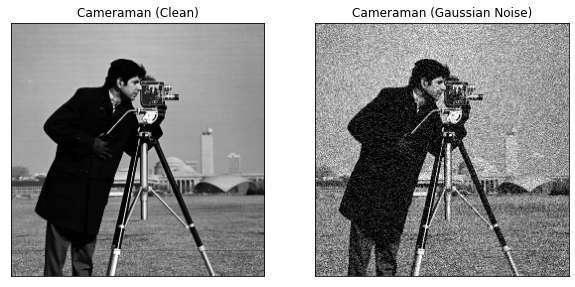

In [ ]:
# read in the images and convert to grayscale for filtering
cameraman_clean_gray = cv2.imread(path + 'cameraman.png', cv2.IMREAD_GRAYSCALE)
cameraman_noise_gray = cv2.imread(path + 'gaussian_cameraman.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(cameraman_clean_gray, cmap="gray")
plt.title("Cameraman (Clean)"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cameraman_noise_gray, cmap="gray")
plt.title("Cameraman (Gaussian Noise)"), plt.xticks([]), plt.yticks([])
plt.show()

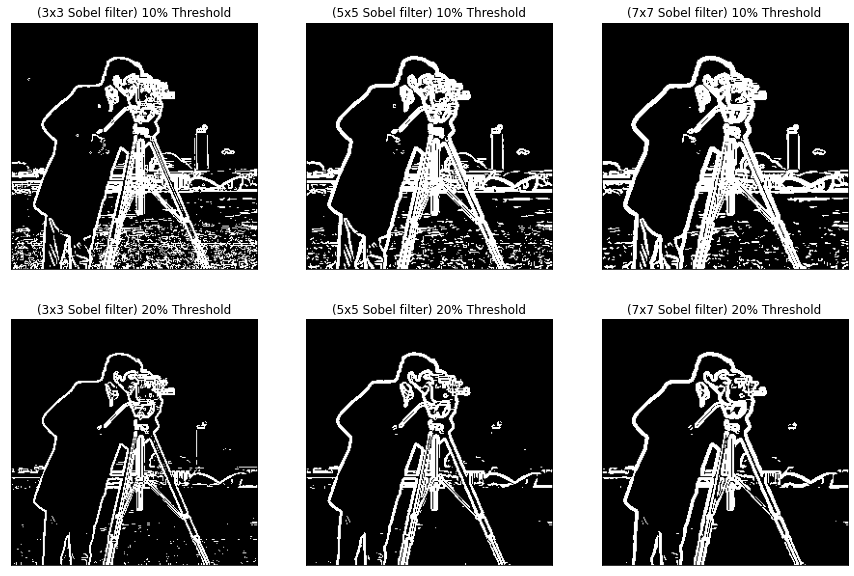

In [ ]:
# detect edges in clean image using 3x3, 5x5 and 7x7 Sobel filter
# 3x3 Sobel filter
I_x_a = cv2.Sobel(cameraman_clean_gray, cv2.CV_64F, 1, 0, ksize=3)
I_y_a = cv2.Sobel(cameraman_clean_gray, cv2.CV_64F, 0, 1, ksize=3)
# 5x5 Sobel filter
I_x_b = cv2.Sobel(cameraman_clean_gray, cv2.CV_64F, 1, 0, ksize=5)
I_y_b = cv2.Sobel(cameraman_clean_gray, cv2.CV_64F, 0, 1, ksize=5)
# 7x7 Sobel filter
I_x_c = cv2.Sobel(cameraman_clean_gray, cv2.CV_64F, 1, 0, ksize=7)
I_y_c = cv2.Sobel(cameraman_clean_gray, cv2.CV_64F, 0, 1, ksize=7)

# compute the Sobel gradient magnitudes
# 3x3 Sobel filter
I_m_a = cv2.magnitude(I_x_a, I_y_a)
# 5x5 Sobel filter
I_m_b = cv2.magnitude(I_x_b, I_y_b)
# 7x7 Sobel filter
I_m_c = cv2.magnitude(I_x_c, I_y_c)

# find maximum pixel value of filtered images
max_a = np.max(I_m_a)
max_b = np.max(I_m_b)
max_c = np.max(I_m_c)

# 10% and 20% of maximum pixel value thresholds
# 10%
T_a_10 = max_a * 10/100
T_b_10 = max_b * 10/100
T_c_10 = max_c * 10/100
# 20%
T_a_20 = max_a * 20/100
T_b_20 = max_b * 20/100
T_c_20 = max_c * 20/100

# threshold the filtered image at 10% and 20% thresholds to detect edges
# 3x3 Sobel filter
ret,gradient_threshold_a_10 = cv2.threshold(I_m_a,T_a_10,255,cv2.THRESH_BINARY)
ret,gradient_threshold_a_20 = cv2.threshold(I_m_a,T_a_20,255,cv2.THRESH_BINARY)
# 5x5 Sobel filter
ret,gradient_threshold_b_10 = cv2.threshold(I_m_b,T_b_10,255,cv2.THRESH_BINARY)
ret,gradient_threshold_b_20 = cv2.threshold(I_m_b,T_b_20,255,cv2.THRESH_BINARY)
# 7x7 Sobel filter
ret,gradient_threshold_c_10 = cv2.threshold(I_m_c,T_c_10,255,cv2.THRESH_BINARY)
ret,gradient_threshold_c_20 = cv2.threshold(I_m_c,T_c_20,255,cv2.THRESH_BINARY)

# display thresholded images
plt.figure(figsize=(15, 10))
plt.subplot(231), plt.imshow(gradient_threshold_a_10, cmap="gray")
plt.title("(3x3 Sobel filter) 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(gradient_threshold_b_10, cmap="gray")
plt.title("(5x5 Sobel filter) 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(gradient_threshold_c_10, cmap="gray")
plt.title("(7x7 Sobel filter) 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(gradient_threshold_a_20, cmap="gray")
plt.title("(3x3 Sobel filter) 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(gradient_threshold_b_20, cmap="gray")
plt.title("(5x5 Sobel filter) 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(gradient_threshold_c_20, cmap="gray")
plt.title("(7x7 Sobel filter) 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

When the filter size is larger, more smoothing occurs in the image. This phenomenon takes place because the Sobel filters (x- and y- image derivative) have a smoothing effect integrated in their kernels. Although this increased smoothing makes the filter less noise sensitve, it also causes the detected edges to be wider (i.e., poor localization).

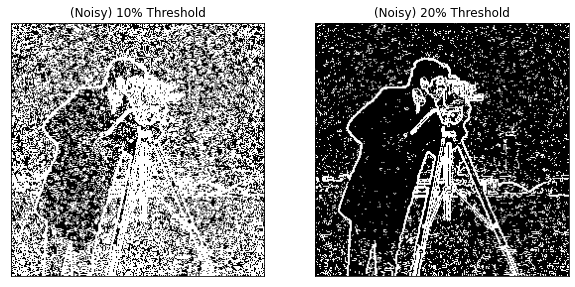

In [ ]:
# detect edges in noisy image using 3x3 Sobel filter
I_x_noise = cv2.Sobel(cameraman_noise_gray, cv2.CV_64F, 1, 0, ksize=3)
I_y_noise = cv2.Sobel(cameraman_noise_gray, cv2.CV_64F, 0, 1, ksize=3)

# compute the Sobel gradient magnitude
I_m_noise = cv2.magnitude(I_x_noise, I_y_noise)

# find maximum pixel value of image
max_noise = np.max(I_m_noise)

# 10% and 20% of maximum pixel value thresholds
# 10%
T_noise_10 = max_noise * 10/100
# 20%
T_noise_20 = max_noise * 20/100

# threshold the image at 10% and 20% thresholds to detect edges
ret,gradient_threshold_noise_10 = cv2.threshold(I_m_noise,T_noise_10,255,cv2.THRESH_BINARY)
ret,gradient_threshold_noise_20 = cv2.threshold(I_m_noise,T_noise_20,255,cv2.THRESH_BINARY)

# display thresholded images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(gradient_threshold_noise_10, cmap="gray")
plt.title("(Noisy) 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gradient_threshold_noise_20, cmap="gray")
plt.title("(Noisy) 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

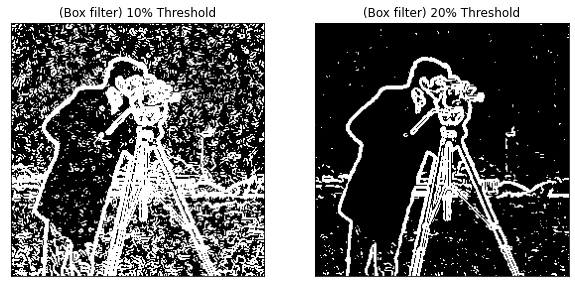

In [ ]:
# filter noisy image using 3x3 Box filter
filtered_cameraman = cv2.blur(cameraman_noise_gray,(3,3))

# detect edges in filtered image using 3x3 Sobel filter
I_x_filtered = cv2.Sobel(filtered_cameraman, cv2.CV_64F, 1, 0, ksize=3)
I_y_filtered = cv2.Sobel(filtered_cameraman, cv2.CV_64F, 0, 1, ksize=3)

# compute the Sobel gradient magnitudes
I_m_filtered = cv2.magnitude(I_x_filtered, I_y_filtered)

# find maximum pixel value of image
max_filtered = np.max(I_m_filtered)

# 10% and 20% of maximum pixel value thresholds
# 10%
T_filtered_10 = max_filtered * 10/100
# 20%
T_filtered_20 = max_filtered * 20/100

# threshold the image at 10% and 20% thresholds to detect edges
ret,gradient_threshold_filtered_10 = cv2.threshold(I_m_filtered,T_filtered_10,255,cv2.THRESH_BINARY)
ret,gradient_threshold_filtered_20 = cv2.threshold(I_m_filtered,T_filtered_20,255,cv2.THRESH_BINARY)

# display thresholded images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(gradient_threshold_filtered_10, cmap="gray")
plt.title("(Box filter) 10% Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gradient_threshold_filtered_20, cmap="gray")
plt.title("(Box filter) 20% Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

Using denoising prior to edge detection reduces the amount of false edges significantly in the output images, especially when the thresholds are higher.

##Canny Edge Dtetction

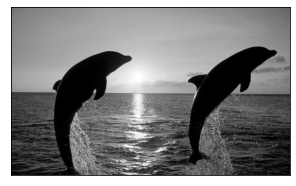

In [ ]:
# read in the image and convert to grayscale for filtering
dolphin_gray = cv2.imread(path + 'dolphin.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5,5))
plt.imshow(dolphin_gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

###1.

1. Simultaneously compute image gradient at every pixel and and perform smoothing by filtering image with x, y derivates of Gaussian 
2. Find magnitude and orientation of gradient at every pixel
3. Perform non-maximum suppression on gradient magnitude
4. Thresholding and linking (hysteresis): use high threshold to start edge curves and low threshold to continue them



###2

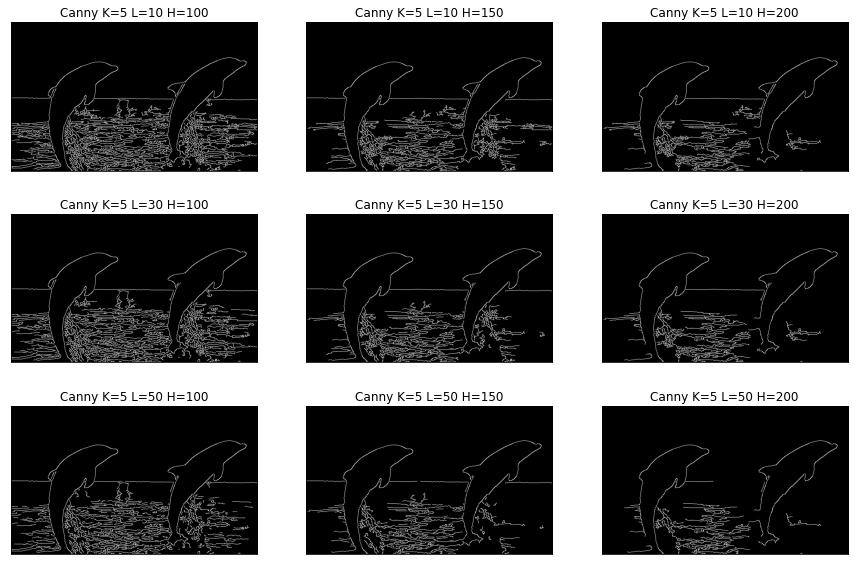

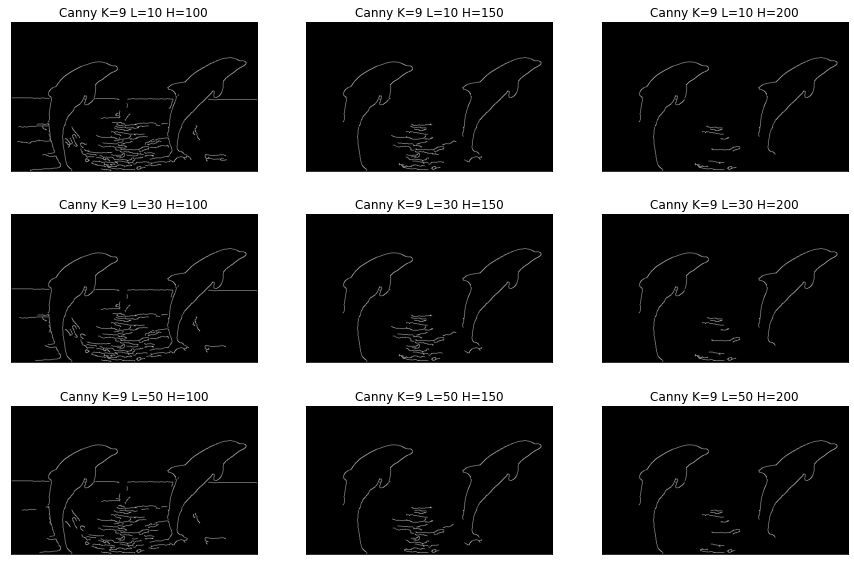

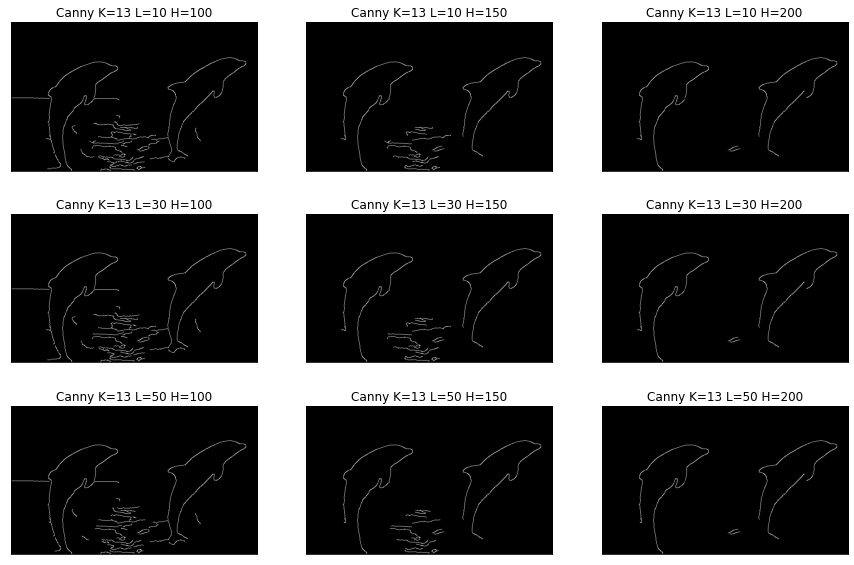

In [ ]:
# HYPERPARAMETERS (K = 5,9,13, L = 10,30,50, H = 100,150,200)
# filter image with Gaussian Smoothing Kernel sizes given above (K = 5,9,13) and sigma=2.75
dolphin_gray_gaussian_size5 = cv2.GaussianBlur(dolphin_gray, (5,5), 2.75, 2.75)
dolphin_gray_gaussian_size9 = cv2.GaussianBlur(dolphin_gray, (9,9), 2.75, 2.75)
dolphin_gray_gaussian_size_13 = cv2.GaussianBlur(dolphin_gray, (13,13), 2.75, 2.75)

# KERNEL SIZE: 5
# L=10
dolphin_gray_canny_5_10_100 = cv2.Canny(dolphin_gray_gaussian_size5, 10, 100, True) # H=100
dolphin_gray_canny_5_10_150 = cv2.Canny(dolphin_gray_gaussian_size5, 10, 150, True) # H=150
dolphin_gray_canny_5_10_200 = cv2.Canny(dolphin_gray_gaussian_size5, 10, 200, True) # H=200
# L=30
dolphin_gray_canny_5_30_100 = cv2.Canny(dolphin_gray_gaussian_size5, 30, 100, True) # H=100
dolphin_gray_canny_5_30_150 = cv2.Canny(dolphin_gray_gaussian_size5, 30, 150, True) # H=150
dolphin_gray_canny_5_30_200 = cv2.Canny(dolphin_gray_gaussian_size5, 30, 200, True) # H=200
# L=50
dolphin_gray_canny_5_50_100 = cv2.Canny(dolphin_gray_gaussian_size5, 50, 100, True) # H=100
dolphin_gray_canny_5_50_150 = cv2.Canny(dolphin_gray_gaussian_size5, 50, 150, True) # H=150
dolphin_gray_canny_5_50_200 = cv2.Canny(dolphin_gray_gaussian_size5, 50, 200, True) # H=200

# display images
plt.figure(figsize=(15, 10))
plt.subplot(331), plt.imshow(dolphin_gray_canny_5_10_100, cmap="gray")
plt.title("Canny K=5 L=10 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(dolphin_gray_canny_5_10_150, cmap="gray")
plt.title("Canny K=5 L=10 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(dolphin_gray_canny_5_10_200, cmap="gray")
plt.title("Canny K=5 L=10 H=200"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(dolphin_gray_canny_5_30_100, cmap="gray")
plt.title("Canny K=5 L=30 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(dolphin_gray_canny_5_30_150, cmap="gray")
plt.title("Canny K=5 L=30 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(dolphin_gray_canny_5_30_200, cmap="gray")
plt.title("Canny K=5 L=30 H=200"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(dolphin_gray_canny_5_50_100, cmap="gray")
plt.title("Canny K=5 L=50 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(dolphin_gray_canny_5_50_150, cmap="gray")
plt.title("Canny K=5 L=50 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(dolphin_gray_canny_5_50_200, cmap="gray")
plt.title("Canny K=5 L=50 H=200"), plt.xticks([]), plt.yticks([])
plt.show()

# KERNEL SIZE: 9
# L=10
dolphin_gray_canny_9_10_100 = cv2.Canny(dolphin_gray_gaussian_size9, 10, 100, True) # H=100
dolphin_gray_canny_9_10_150 = cv2.Canny(dolphin_gray_gaussian_size9, 10, 150, True) # H=150
dolphin_gray_canny_9_10_200 = cv2.Canny(dolphin_gray_gaussian_size9, 10, 200, True) # H=200
# L=30
dolphin_gray_canny_9_30_100 = cv2.Canny(dolphin_gray_gaussian_size9, 30, 100, True) # H=100
dolphin_gray_canny_9_30_150 = cv2.Canny(dolphin_gray_gaussian_size9, 30, 150, True) # H=150
dolphin_gray_canny_9_30_200 = cv2.Canny(dolphin_gray_gaussian_size9, 30, 200, True) # H=200
# L=50
dolphin_gray_canny_9_50_100 = cv2.Canny(dolphin_gray_gaussian_size9, 50, 100, True) # H=100
dolphin_gray_canny_9_50_150 = cv2.Canny(dolphin_gray_gaussian_size9, 50, 150, True) # H=150
dolphin_gray_canny_9_50_200 = cv2.Canny(dolphin_gray_gaussian_size9, 50, 200, True) # H=200

# display images
plt.figure(figsize=(15, 10))
plt.subplot(331), plt.imshow(dolphin_gray_canny_9_10_100, cmap="gray")
plt.title("Canny K=9 L=10 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(dolphin_gray_canny_9_10_150, cmap="gray")
plt.title("Canny K=9 L=10 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(dolphin_gray_canny_9_10_200, cmap="gray")
plt.title("Canny K=9 L=10 H=200"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(dolphin_gray_canny_9_30_100, cmap="gray")
plt.title("Canny K=9 L=30 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(dolphin_gray_canny_9_30_150, cmap="gray")
plt.title("Canny K=9 L=30 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(dolphin_gray_canny_9_30_200, cmap="gray")
plt.title("Canny K=9 L=30 H=200"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(dolphin_gray_canny_9_50_100, cmap="gray")
plt.title("Canny K=9 L=50 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(dolphin_gray_canny_9_50_150, cmap="gray")
plt.title("Canny K=9 L=50 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(dolphin_gray_canny_9_50_200, cmap="gray")
plt.title("Canny K=9 L=50 H=200"), plt.xticks([]), plt.yticks([])
plt.show()

# KERNEL SIZE: 13
# L=10
dolphin_gray_canny_13_10_100 = cv2.Canny(dolphin_gray_gaussian_size_13, 10, 100, True) # H=100
dolphin_gray_canny_13_10_150 = cv2.Canny(dolphin_gray_gaussian_size_13, 10, 150, True) # H=150
dolphin_gray_canny_13_10_200 = cv2.Canny(dolphin_gray_gaussian_size_13, 10, 200, True) # H=200
# L=30
dolphin_gray_canny_13_30_100 = cv2.Canny(dolphin_gray_gaussian_size_13, 30, 100, True) # H=100
dolphin_gray_canny_13_30_150 = cv2.Canny(dolphin_gray_gaussian_size_13, 30, 150, True) # H=150
dolphin_gray_canny_13_30_200 = cv2.Canny(dolphin_gray_gaussian_size_13, 30, 200, True) # H=200
# L=50
dolphin_gray_canny_13_50_100 = cv2.Canny(dolphin_gray_gaussian_size_13, 50, 100, True) # H=100
dolphin_gray_canny_13_50_150 = cv2.Canny(dolphin_gray_gaussian_size_13, 50, 150, True) # H=150
dolphin_gray_canny_13_50_200 = cv2.Canny(dolphin_gray_gaussian_size_13, 50, 200, True) # H=200

# display images
plt.figure(figsize=(15, 10))
plt.subplot(331), plt.imshow(dolphin_gray_canny_13_10_100, cmap="gray")
plt.title("Canny K=13 L=10 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(dolphin_gray_canny_13_10_150, cmap="gray")
plt.title("Canny K=13 L=10 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(dolphin_gray_canny_13_10_200, cmap="gray")
plt.title("Canny K=13 L=10 H=200"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(dolphin_gray_canny_13_30_100, cmap="gray")
plt.title("Canny K=13 L=30 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(dolphin_gray_canny_13_30_150, cmap="gray")
plt.title("Canny K=13 L=30 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(dolphin_gray_canny_13_30_200, cmap="gray")
plt.title("Canny K=13 L=30 H=200"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(dolphin_gray_canny_13_50_100, cmap="gray")
plt.title("Canny K=13 L=50 H=100"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(dolphin_gray_canny_13_50_150, cmap="gray")
plt.title("Canny K=13 L=50 H=150"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(dolphin_gray_canny_13_50_200, cmap="gray")
plt.title("Canny K=13 L=50 H=200"), plt.xticks([]), plt.yticks([])
plt.show()

###3.

If the Gaussian Smoothing Kernel size (K) increases, the amount of false edges decreases, escpecially if the standard deviation is optimal.

If the higher threshold (H) used for hysteresis increases, the amount of false edges decreases. However, the risk of **"sure-edge"** pixels being discarded also increases with higher H values.

If the lower threshold (L) used for hysteresis increases, the amount of false edges decreases. However, the risk of **potential "sure-edge"** pixels being discarded also increases with higher L values. Furthermore, the amount of influence that L has on the final number of detected edges directly depends on the kernel size (K). As K increases, the amount of influence that L has decreases.

###4.

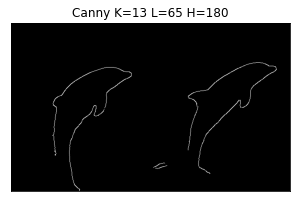

In [ ]:
# filter image with Gaussian Smoothing Kernel K=13 and sigma=2.75
dolphin_gray_gaussian_size13 = cv2.GaussianBlur(dolphin_gray, (13,13), 2.75, 2.75)

# K=13, L=65, H=180
only_dolphin_edge_canny = cv2.Canny(dolphin_gray_gaussian_size13, 65, 180, True)

plt.figure(figsize=(5,5))
plt.imshow(only_dolphin_edge_canny, cmap='gray')
plt.title("Canny K=13 L=65 H=180"), plt.xticks([]), plt.yticks([])
plt.show()

##Harris Corner Detection

In [ ]:
# function that performs non-maximum suppression
def my_non_max_suppression(img):
  
  M, N = img.shape
  Z = np.zeros_like(img)

  for i in range(1,M-1): # Note that we are leaving 1 pixel gap on each side of image
    for j in range(1,N-1): # as for boundary pixels one of its neighbourhood pixel is not defined
      pixel_intensity = img[i,j]
      if ((img[i-1,j-1] < pixel_intensity) and (img[i-1,j] < pixel_intensity) and (img[i-1,j+1] < pixel_intensity)
          and (img[i,j-1] < pixel_intensity) and (img[i,j+1] < pixel_intensity) and (img[i+1,j-1] < pixel_intensity)
          and (img[i+1,j] < pixel_intensity) and (img[i+1,j+1] < pixel_intensity)):
        Z[i,j] = pixel_intensity
  return Z

In [ ]:
# function that implements Gaussian filter
def my_gaussianBlur(input_image,size,sigma):
  # construct gaussian kernel with specific size and standard deviation
  size = int(size) // 2
  y, x = np.mgrid[-size:size+1, -size:size+1]
  normal = 1 / (2.0 * np.pi * sigma**2)
  g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
  
  # apply convolution using cv2.filter2D
  img_gauss = cv2.filter2D(input_image, cv2.CV_64F, g)
  return img_gauss

In [ ]:
# function that implements the Harris corner detector
def my_cornerHarris(input_image, gaussian_size, k):

  # apply smoothing to input image
  input_image_gaussian = my_gaussianBlur(input_image, 5, 1)

  # sobel kernel size will always be 3
  Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
  Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
  # detect edges in input image using 3x3 Sobel filter
  I_x = cv2.filter2D(input_image_gaussian, cv2.CV_64F, Kx)
  I_y = cv2.filter2D(input_image_gaussian, cv2.CV_64F, Ky)

  # compute Square of derivatives
  I_xx = I_x * I_x
  I_yy = I_y * I_y
  I_xy = I_x * I_y

  # apply Gaussian filtering
  I_xx_gaussian = my_gaussianBlur(I_xx, gaussian_size, 1)
  I_yy_gaussian = my_gaussianBlur(I_yy, gaussian_size, 1)
  I_xy_gaussian = my_gaussianBlur(I_xy, gaussian_size, 1)

  # apply formula
  har = (I_xx_gaussian * I_yy_gaussian) - pow(I_xy_gaussian, 2) - (k * pow((I_xx_gaussian + I_yy_gaussian),2))

  # non-maximum suppression
  har_non_max = my_non_max_suppression(har)
  
  return har_non_max


In [ ]:
# function that adds red circles after Harris corner detection
def add_circles(input_image, thresh ,circle_radius):
  # copy image
  img_disp_input_image = input_image.copy()

  # convert to grayscale
  input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

  # Harris Corner Detection
  har_input_image = my_cornerHarris(input_image_gray, 3, 0.05)

  # normalize corner map [0,2]
  cv2.normalize(har_input_image, har_input_image, 0, 2, cv2.NORM_MINMAX)

  # list all points higher than threshold
  loc = np.where(har_input_image >= thresh)

  # loop though points
  for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    cv2.circle(img_disp_input_image, pt, circle_radius, (255,0,0), -1)
  return img_disp_input_image

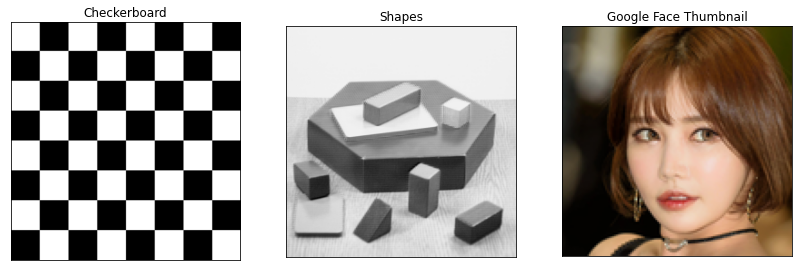

In [ ]:
# read in the images
checkerboard = cv2.imread(path + 'checkerboard.png')
shapes = cv2.imread(path + 'shapes.png')
thumbnail = cv2.imread(path + '15021.png')
thumbnail = cv2.cvtColor(thumbnail, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14,5))
plt.subplot(131), plt.imshow(checkerboard)
plt.title("Checkerboard"),  plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(shapes)
plt.title("Shapes"),  plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thumbnail)
plt.title("Google Face Thumbnail"),  plt.xticks([]), plt.yticks([])
plt.show()

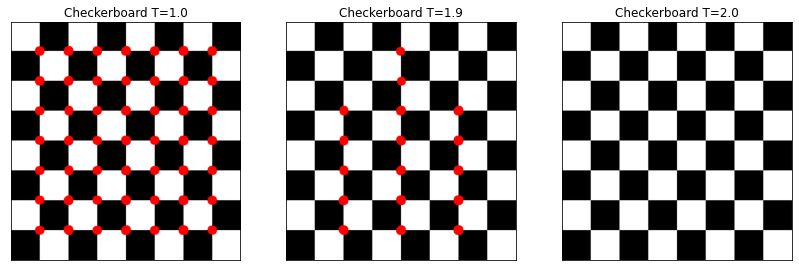

In [ ]:
# CHECKERBOARD
# Threshold=1.0
checkerboard_T1 = add_circles(checkerboard, 1.0, 15)

# Threshold=1.9
checkerboard_T2 = add_circles(checkerboard, 1.9, 15)

# Threshold=2.0
checkerboard_T3 = add_circles(checkerboard, 2.0, 15)

plt.figure(figsize=(14,5))
plt.subplot(131), plt.imshow(checkerboard_T1)
plt.title("Checkerboard T=1.0"),  plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(checkerboard_T2)
plt.title("Checkerboard T=1.9"),  plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(checkerboard_T3)
plt.title("Checkerboard T=2.0"),  plt.xticks([]), plt.yticks([])
plt.show()

As the threshold increases, the amount of displayed corners for the checkerboard decreases. This observation makes sense because non-maximum suppression does not change the pixel values of the detected local maximums, so a high threshold may, in fact, hide those local maximum pixels possessing smaller intensities.

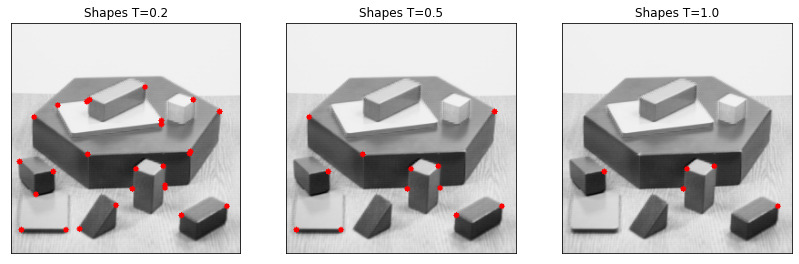

In [ ]:
# SHAPES
# Threshold=0.2
shapes_T1 = add_circles(shapes, 0.2, 3)

# Threshold=0.5
shapes_T2 = add_circles(shapes, 0.5, 3)

# Threshold=1.0
shapes_T3 = add_circles(shapes, 1.0, 3)

plt.figure(figsize=(14,5))
plt.subplot(131), plt.imshow(shapes_T1)
plt.title("Shapes T=0.2"),  plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(shapes_T2)
plt.title("Shapes T=0.5"),  plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(shapes_T3)
plt.title("Shapes T=1.0"),  plt.xticks([]), plt.yticks([])
plt.show()

As with the checkerboard image, the amount of detected corners in the shape image decreases with higher thresholds. However, in this case, even when the threshold is optimal, not all corners are being detected. This "error" may be due to the fact that there is a wider range of pixel intensities. This range would make the Sobel filter response less reliable, and, thus, make the Cornerness function response in the Harris corner detector less accurate as well.

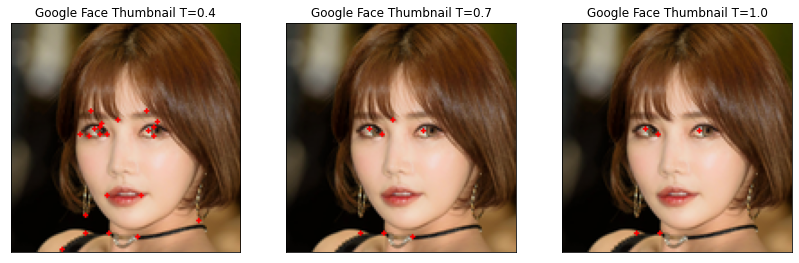

In [ ]:
# GOOGLE FACE THUMBNAIL
# Threshold=0.4
thumbnail_T1 = add_circles(thumbnail, 0.4, 1)

# Threshold=0.7
thumbnail_T2 = add_circles(thumbnail, 0.7, 1)

# Threshold=1.0
thumbnail_T3 = add_circles(thumbnail, 1.0, 1)

plt.figure(figsize=(14,5))
plt.subplot(131), plt.imshow(thumbnail_T1)
plt.title("Google Face Thumbnail T=0.4"),  plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thumbnail_T2)
plt.title("Google Face Thumbnail T=0.7"),  plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thumbnail_T3)
plt.title("Google Face Thumbnail T=1.0"),  plt.xticks([]), plt.yticks([])
plt.show()

It is hard to evaluate how well the Harris corner detector performs in this case because it is applied to a **face** image. As far as pure observations go, more "corners" were detected around the eyes at low thresholds compared to high thresholds. Furthermore, like with the other images, less "corners" were detected in general at lower thresholds for the face image.